# Cálculo da distância e identificação do exemplo mais próximo

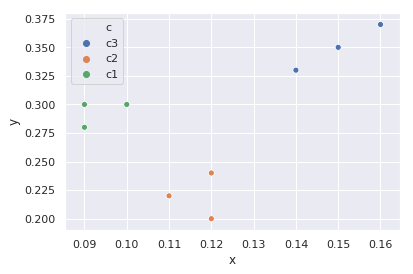

In [37]:
import seaborn as sns
sns.set()

df = pd.DataFrame({
    'x': [0.15, 0.11, 0.12, 0.09, 0.10, 0.09, 0.12, 0.14, 0.16], 
    'y': [0.35, 0.22, 0.24, 0.30, 0.30, 0.28, 0.20, 0.33, 0.37], 
    'c': ['c3', 'c2', 'c2', 'c1', 'c1','c1','c2', 'c3', 'c3']})

ax = sns.scatterplot(x="x", y="y",hue="c", data= df)

In [38]:
new_point = [[0.14, 0.3]]
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=1)
neigh.fit(df[['x','y']], df['c'])
print(neigh.kneighbors(new_point))

(array([[0.03]]), array([[7]]))


# Considerando valores com escalas diferentes

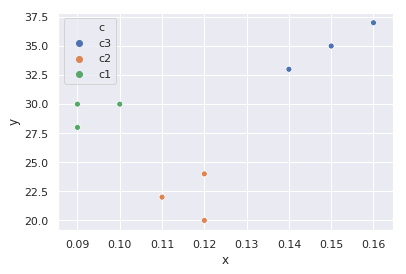

In [47]:
df = pd.DataFrame({
    'x': [0.15, 0.11, 0.12, 0.09, 0.10, 0.09, 0.12, 0.14, 0.16], 
    'y': [35.0, 22.0, 24.0, 30.0, 30.0, 28.0, 20.0, 33.0, 37.0], 
    'c': ['c3', 'c2', 'c2', 'c1', 'c1','c1','c2', 'c3', 'c3']})

ax = sns.scatterplot(x="x", y="y",hue="c", data= df)

In [48]:
new_point = [[0.14, 30]]

neigh = NearestNeighbors(n_neighbors=1)
neigh.fit(df[['x','y']], df['c'])
print(neigh.kneighbors(new_point))

(array([[0.04]]), array([[4]]))


Percebe-se a necessidade de normalizar os valores dos atributos

# Uso do Knn com dados normalizados

In [56]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
scaler.fit(df[['x','y']])

df_normalized = scaler.transform(df[['x','y']])
df_normalized = pd.DataFrame(df_normalized, columns = ['x', 'y'])
df_normalized['c'] = df['c']
df_normalized

,x,y,c
0,0.857143,0.882353,c3
1,0.285714,0.117647,c2
2,0.428571,0.235294,c2
3,0.000000,0.588235,c1
4,0.142857,0.588235,c1
5,0.000000,0.470588,c1
6,0.428571,0.000000,c2
7,0.714286,0.764706,c3
8,1.000000,1.000000,c3


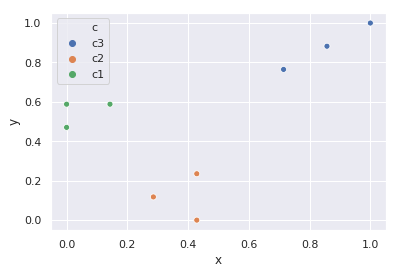

In [57]:
ax = sns.scatterplot(x="x", y="y",hue="c", data= df_normalized)

In [59]:
neigh = NearestNeighbors(n_neighbors=1)
neigh.fit(df_normalized[['x','y']], df_normalized['c'])

new_point = [[0.14, 30]]
t = scaler.transform(new_point)
print(t)
print(neigh.kneighbors(t))

[[0.71428571 0.58823529]]
(array([[0.17647059]]), array([[7]]))
